# Decision Tree

Konuyla ilgiuli guzel bir Medium makalesi;

https://medium.com/deep-learning-turkiye/karar-a%C4%9Fa%C3%A7lar%C4%B1-makine-%C3%B6%C4%9Frenmesi-serisi-3-a03f3ff00ba5

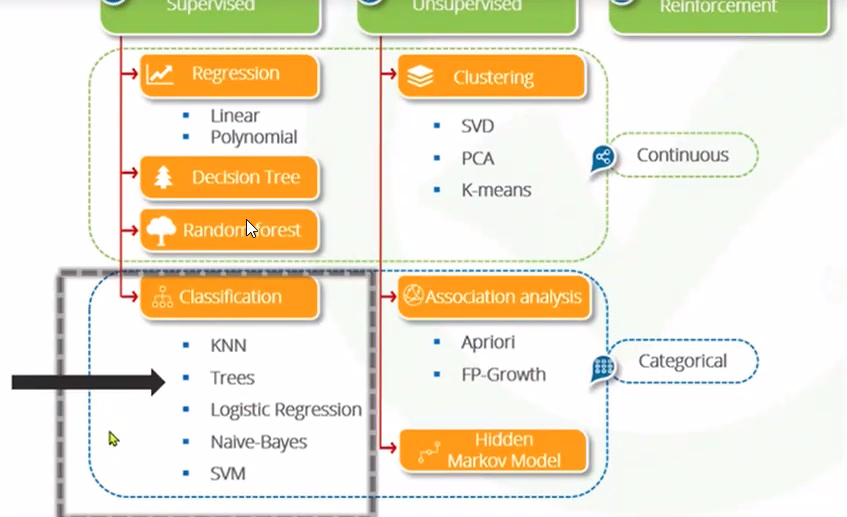


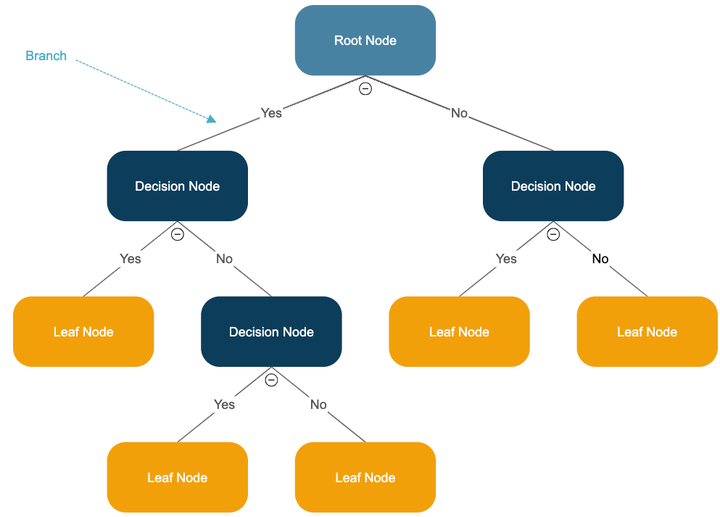


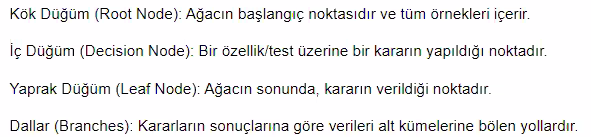



Tam saflik (purity) istersek OVERFIT'e gider.

Burada **purity** kavrami karsimiza cikiyor.

**Decision tree**; **if - else ile calisan bir algoritmadir**



Mesela 1 ve 0’dan olusan binary class bir datasetim olsun.
X 1’den buyuk mu--> hayir--> 6 degeri bu sekilde biliyor basta. Pure bir yesil class, bunu belirliyor. Leaf node.

X2 1’den buyuk mu sorusuna gore de 2 class ayirdi:

X2 1’den buyuk ise, 2 class var:
-1.8’den buyuk ise sag ust kosedeki yesillerden olusan pure bir class elde ediyor. Leaf node.
-1.8’den kucuk ise ust ortada kalan kirmizilardan olusan pure bir class elde ediyor. Leaf node

X2 1’den kucuk ise:
Altta kalan kisim icin, bu sefer

X1 2’den buyuk mu diye sorunca, evet ise en sagdaki hepsi kirmizi olan classi da pure olarak belirlemis oluyor. Leaf node

X1 2’den kucuk mu diye sorunca, evet ise-->alt ortadaki kirmizi ve yesil karisik olan class icin yeni sorular sormali. Ama bir yerde durdurmazsam, hepsini bilinceye kadar sorar. Ama sonunda overfitting olur.



Agacin **derinligini sinirlamaliyiz** yoksa **ezberlemeye = OVERFITe** gider. 
**max_depth=** Karar Ağacının maksimum derinliğini ifade eder. Değer girilmezse limitsiz olur. Model overfit(aşırı uyum) olmuşsa düşürülmesi gerekir.

Musteri segmentasyonunda da kullanilabilir DT






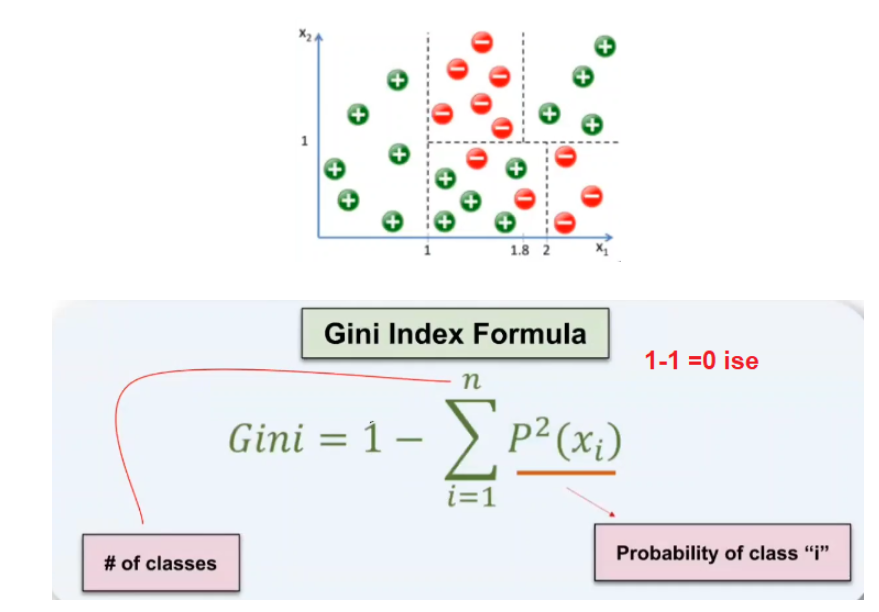


GINI **0-1 arasinda deger alir**. **0’a ne kadar yakınsa o kadar iyi ayrım yapmış olur**. 
Gini = 0 ise purity (saflik) soz konusudur. Bu bizim istedigimiz bir sey. 

**GINI = 0.5** ise esit sayida gozlem vardir o nodda. 

**GINI yanlis siniflandirma olasiligini olcer**.  


**Entropy:** Temel fikir, bir gruplamanın bozukluğunu hedef değişkene göre ölçmektir ama bunu log2 tabanında yapar.

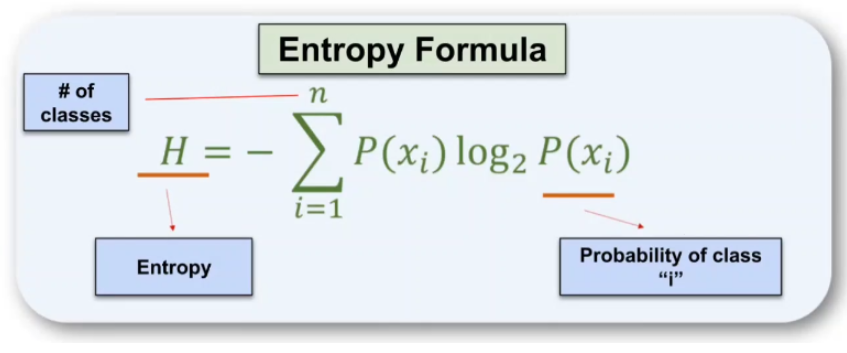

**Entropy = Information Gain** olarak da kullanilir.

**Entropy'ye bagli information gain** kullaniyoruz biz burada


**Entropide 1 en karmasik (kaotik) durum, 0 ise saflik durumudur**. 



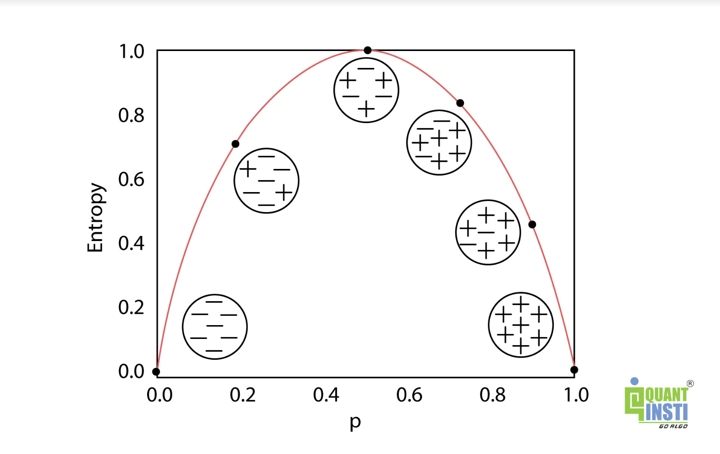


**Entropy**

**Tanım:** Bir setin ne kadar karışık (yani homojen olmayan) olduğunu belirten bir ölçüttür. Entropi, bir sette sadece tek bir sınıf varsa 0 olur.

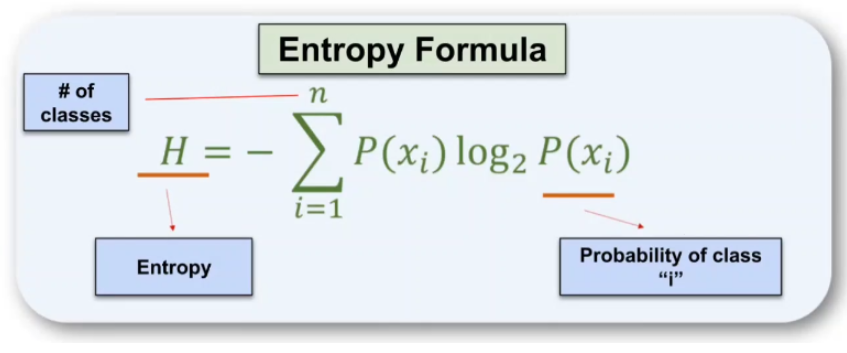

**Hepsi ayni tur oldugunda Entropy 0, esit sayida olduklarinda (prob = 0.5) entropy 1. Bu KAOS durumuur**. 


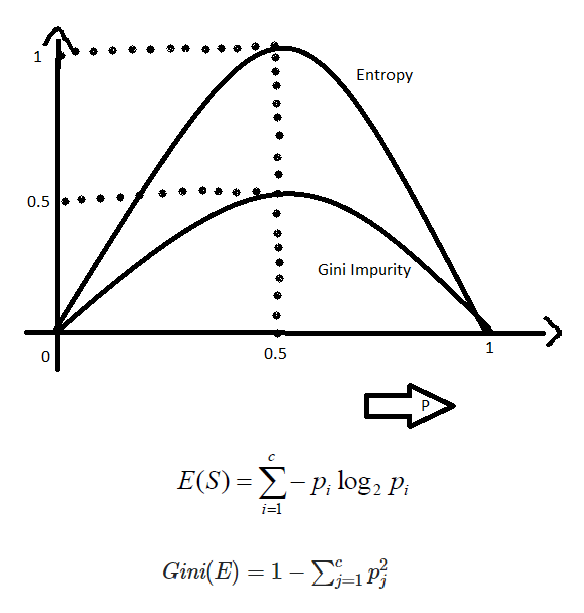


**Entropy negatif olamaz**

* **Entropy --> Infromation Gain** de kullanilmak uzere hesaplaniyor, tek basina kullanilmiyor.

* **Entropy'nin 0'a yakinmasi istenir**. O zaman **class pure** olur. 






**Bilgi Kazancı (Information Gain)**

**Tanım:** Bir özelliğin bölünme ölçütü olarak ne kadar iyi çalıştığını belirtir. Özgül bir özelliğin bilgi kazancı, bölünmeden önceki entropi ile bölündükten sonraki entropi arasındaki fark olarak tanımlanır.

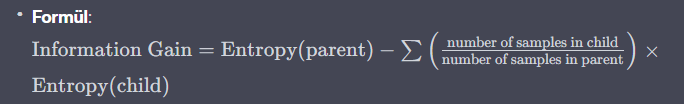


**Örnek:** Eğer bir özellik "hava durumu" olsun ve hedef değişken "dışarıya çıkıp çıkmama" olsun. Hava durumunun "yağmurlu", "güneşli" veya "bulutlu" olabileceğini düşünelim. Bilgi kazancı, hedef değişkenin "yağmurlu", "güneşli" veya "bulutlu" günlerde nasıl dağıldığına bağlı olarak bu özelliğin ne kadar bilgi kazandırdığını belirler.

**Gini Impurity**

**Tanım:** Bir özelliğin ne kadar saflıkta (yani homojen) olduğunu belirten bir ölçümdür. Gini saflığı 0 olduğunda, bir düğümdeki tüm örnekler aynı sınıfa aittir.

**örneğin:** x class olma olasılığı 1 olan bir sınıfın Gini'si 0 çıkar:

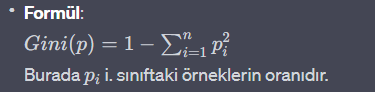

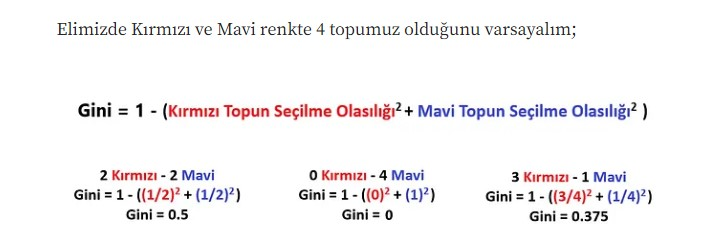



**Entropy'de de Gini'de de 0 safligi gosterir.**

**Entropy'de 1, Gini'de 0.5 KAOS durumunu gosterir**.


**Entropy daha dengeli agaclar uretme egilimlidir. Algoritmasi karmasik, ama daha dogru skorlar uretir**. 

**GINI daha hizli calisir, cok buyuk veri setlerinde GINI tercih edilir.** 

Entropi ile Gini arasında çok büyük bir fark yoktur. **Entropi daha dengeli bir ağaç çıkarmaya meyilli** iken **Gini, frekansı fazla olan sınıfı ayrıştırmaya meyillidir**.

* IMKAN VARSA HEM ENTRIOPI HEM GINI'YI KULLANIP SORLARI KARSILASTIR, EN IYI SKORU VERENI TERCIH ET. 


# Data Set

Palmer Archipelago (Antarktika) bölgesindeki penguenler hakkında bilgiler içerir.

Temel özellikleri şunlardır:

**species:** Penguenin türünü gösterir. Örnek değerler: Adelie, Chinstrap, Gentoo.

**island:** Penguenin gözlendiği ada. Örnek değerler: Biscoe, Dream, Torgersen.

**culmen_length_mm:** Penguenin gagasının uzunluğu (milimetre cinsinden).

**culmen_depth_mm:** Penguenin gagasının derinliği (milimetre cinsinden).

**flipper_length_mm:** Penguenin yüzgeç uzunluğu (milimetre cinsinden).

**body_mass_g:** Penguenin vücut ağırlığı (gram cinsinden).

**sex:** Penguenin cinsiyeti.

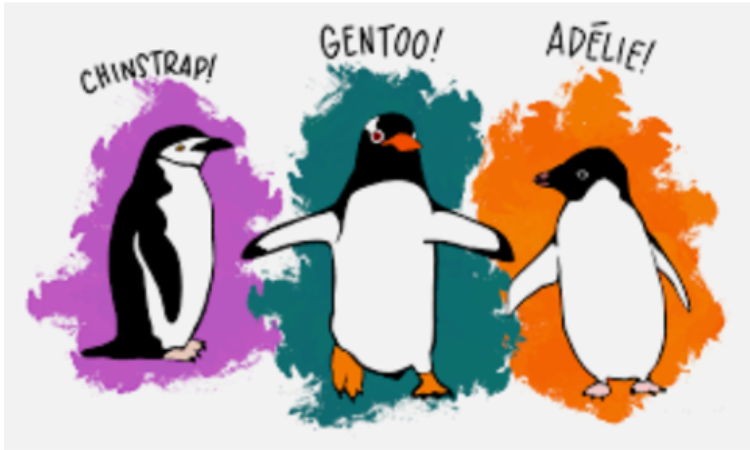


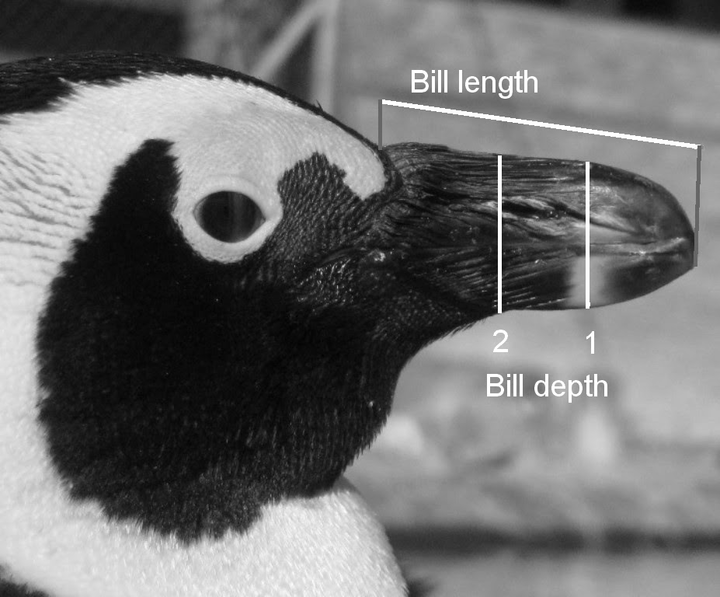

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#plt.rcParams["figure.figsize"] = (10,6)

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
import plotly.express as px  # 3 d grafik
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
from yellowbrick.classifier import ClassPredictionError
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer
from sklearn.tree import plot_tree

import pygwalker as pyg #pip install pygwalker

In [2]:
# 384 gozlem 10 milyonu temsil eder.
# Mumkun oldugu kadar train datasini artirmak lazim. 
# Trainde kotu olan skorlar testte iyi de gelebilir. 

In [3]:
df = pd.read_csv("penguins_size.csv")
df.head()

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
df.describe().T

count         mean         std     min       25%      50%  \
culmen_length_mm   342.0    43.921930    5.459584    32.1    39.225    44.45   
culmen_depth_mm    342.0    17.151170    1.974793    13.1    15.600    17.30   
flipper_length_mm  342.0   200.915205   14.061714   172.0   190.000   197.00   
body_mass_g        342.0  4201.754386  801.954536  2700.0  3550.000  4050.00   

                      75%     max  
culmen_length_mm     48.5    59.6  
culmen_depth_mm      18.7    21.5  
flipper_length_mm   213.0   231.0  
body_mass_g        4750.0  6300.0

In [6]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [7]:
18/344 # 344 de max 18 eksik veri var sutununda. 

0.05232558139534884

In [8]:
10/344 # 344 de min 10 eksik veri var sutununda. 

0.029069767441860465

In [9]:
df = df.dropna()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [11]:
df.head()

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
4  Adelie  Torgersen              36.7             19.3              193.0   
5  Adelie  Torgersen              39.3             20.6              190.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
4       3450.0  FEMALE  
5       3650.0    MALE

In [12]:
# Target   --> "species" burada

## Mini EDA and Missing Values

In [13]:
df["sex"].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [14]:
df["island"].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [15]:
df["species"].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [16]:
df[df["sex"]=="."]  # sex sutununda . olarak girilen veriye mudahale ediyoruz

species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
336  Gentoo  Biscoe              44.5             15.7              217.0   

     body_mass_g sex  
336       4875.0   .

In [17]:
df[df.species=="Gentoo"].groupby("sex").describe().T  # gentoo turunde oldugunu bi ustteki tablodan yakaladik.

sex                           .       FEMALE         MALE
culmen_length_mm  count     1.0    58.000000    61.000000
                  mean     44.5    45.563793    49.473770
                  std       NaN     2.051247     2.720594
                  min      44.5    40.900000    44.400000
                  25%      44.5    43.850000    48.100000
                  50%      44.5    45.500000    49.500000
                  75%      44.5    46.875000    50.500000
                  max      44.5    50.500000    59.600000
culmen_depth_mm   count     1.0    58.000000    61.000000
                  mean     15.7    14.237931    15.718033
                  std       NaN     0.540249     0.741060
                  min      15.7    13.100000    14.100000
                  25%      15.7    13.800000    15.200000
                  50%      15.7    14.250000    15.700000
                  75%      15.7    14.600000    16.100000
                  max      15.7    15.500000    17.300000
flipper_length_mm count     1.0    58.000000    61.000000
                  mean    217.0   212.706897   221.540984
                  std       NaN     3.897856     5.673252
                  min     217.0   203.000000   208.000000
                  25%     217.0   210.000000   218.000000
                  50%     217.0   212.000000   221.000000
                  75%     217.0   215.000000   225.000000
                  max     217.0   222.000000   231.000000
body_mass_g       count     1.0    58.000000    61.000000
                  mean   4875.0  4679.741379  5484.836066
                  std       NaN   281.578294   313.158596
                  min    4875.0  3950.000000  4750.000000
                  25%    4875.0  4462.500000  5300.000000
                  50%    4875.0  4700.000000  5500.000000
                  75%    4875.0  4875.000000  5700.000000
                  max    4875.0  5200.000000  6300.000000

In [18]:
# yukaridaki tabloyu ve eksik veri olan satiri karsilastirinca culmen_depth_mm 15.7 oldugu ve
# culmen_depth_mm Female de max 15.5 olabildigi goruluyor bu sebeple eksik cinsiyetin MALE olduguna karar veriyoruz

In [19]:
# "flipper_length_mm" e gore bu penguen MALE olmak zorunda. 

In [20]:
df.loc[336, "sex"] = "MALE"  # atama yaptik

In [21]:
df.loc[336, "sex"]  #kontrol ettik

'MALE'

## Visualization

In [22]:
df["species"].value_counts()

Adelie       146
Gentoo       120
Chinstrap     68
Name: species, dtype: int64

In [23]:
# veri seti "unbalance" duruyor. Coklu siniflamada unbalance olayina direk karar veremiyoruz. 
# Skorlardan sonra balance / unbalance olduguna karar verebiliriz.
# Skorlar iyi gelirse balance diyebiliriz. 
# Recall ve Precison cok dusuk gelirse "unbalance" deriz.

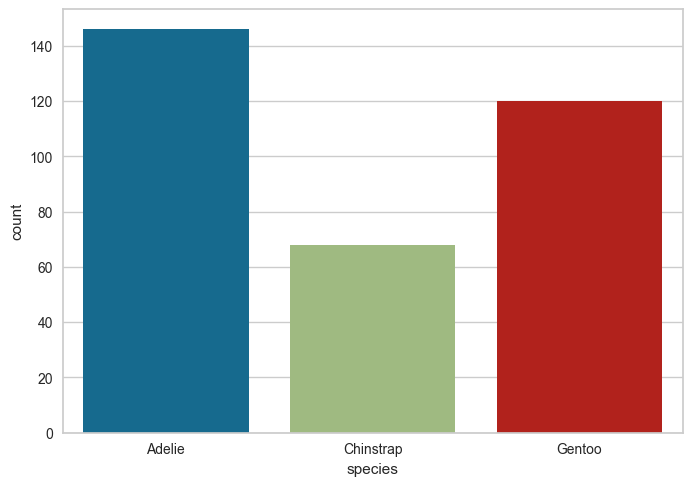

In [24]:
sns.countplot(x = "species", data = df);

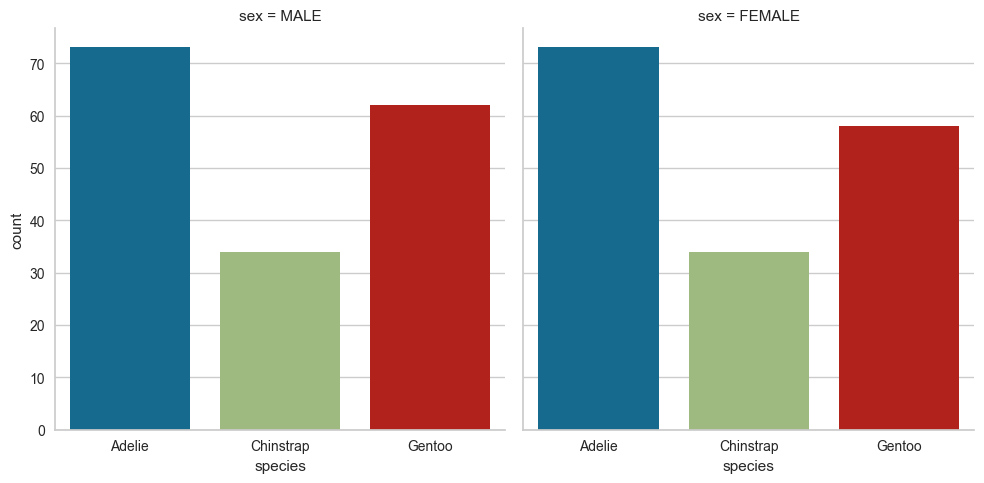

In [25]:
# Harika bir grafik, kullan bunu ileride

sns.catplot(x = "species", data = df, kind = "count", col = "sex");

<Figure size 1200x600 with 0 Axes>

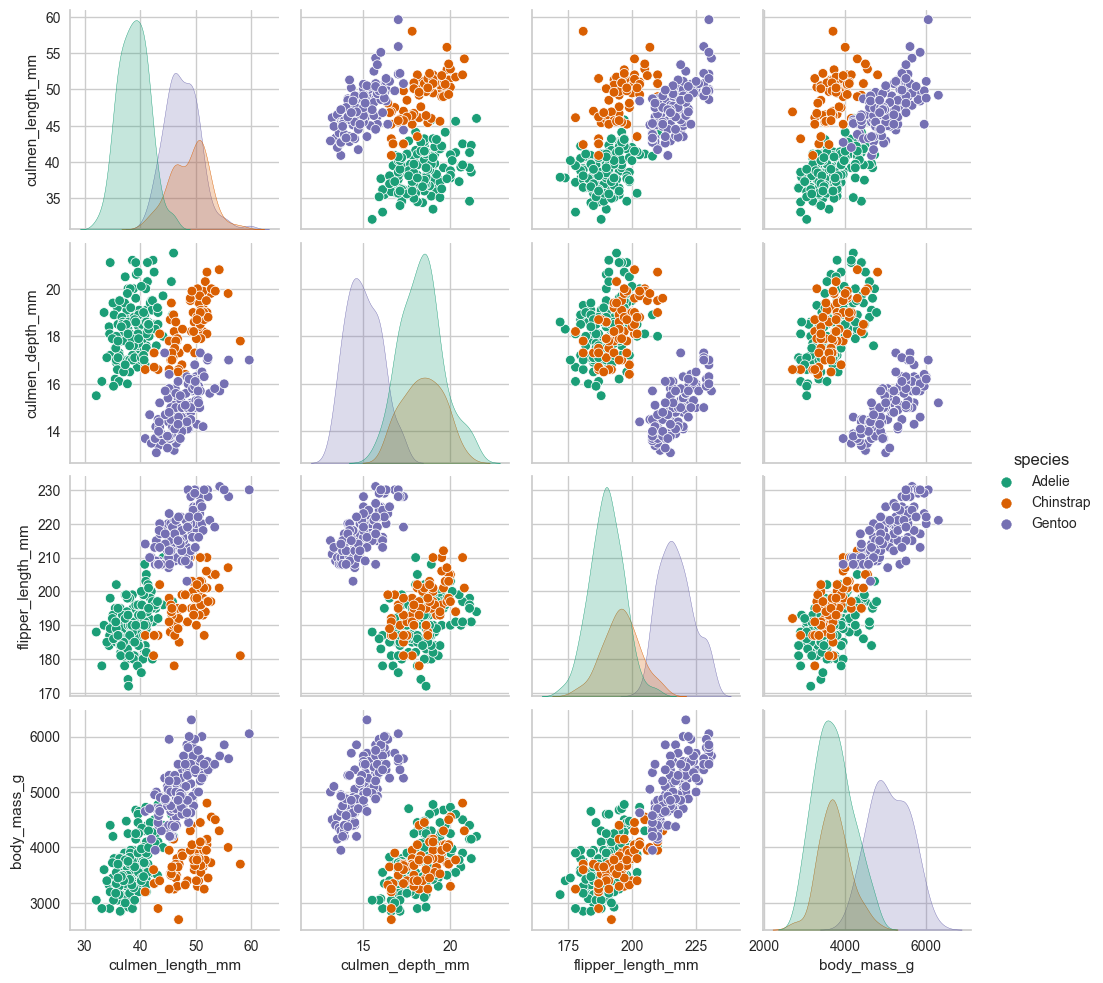

In [26]:
plt.figure(figsize=(12,6))
sns.pairplot(df,hue='species',palette='Dark2')
plt.show()

In [27]:
fig = px.scatter_3d(df, 
                    x='culmen_length_mm',
                    y='flipper_length_mm',
                    z='culmen_depth_mm',
                    color='species')
fig.show();

In [28]:
# 3D grafige gore turler cokda ic ice girmis degil. 
# Classification analizlerinde dataya mutlaka 3D grafikle de bakmak lazim, iyi fikir verir.

In [29]:
pyg.walk(df) # pyg walker ogrenmis olduk :)

Box(children=(HTML(value='<div id="ifr-pyg-0" style="height: auto">\n    <head>\n        <meta http-equiv="Con…

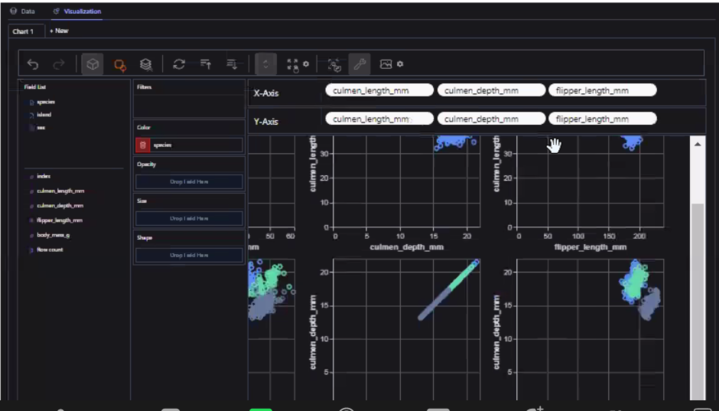

In [30]:
df.select_dtypes("number")# numeric veriler

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
0                39.1             18.7              181.0       3750.0
1                39.5             17.4              186.0       3800.0
2                40.3             18.0              195.0       3250.0
4                36.7             19.3              193.0       3450.0
5                39.3             20.6              190.0       3650.0
..                ...              ...                ...          ...
338              47.2             13.7              214.0       4925.0
340              46.8             14.3              215.0       4850.0
341              50.4             15.7              222.0       5750.0
342              45.2             14.8              212.0       5200.0
343              49.9             16.1              213.0       5400.0

[334 rows x 4 columns]

In [31]:
df.head()

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
4  Adelie  Torgersen              36.7             19.3              193.0   
5  Adelie  Torgersen              39.3             20.6              190.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
4       3450.0  FEMALE  
5       3650.0    MALE

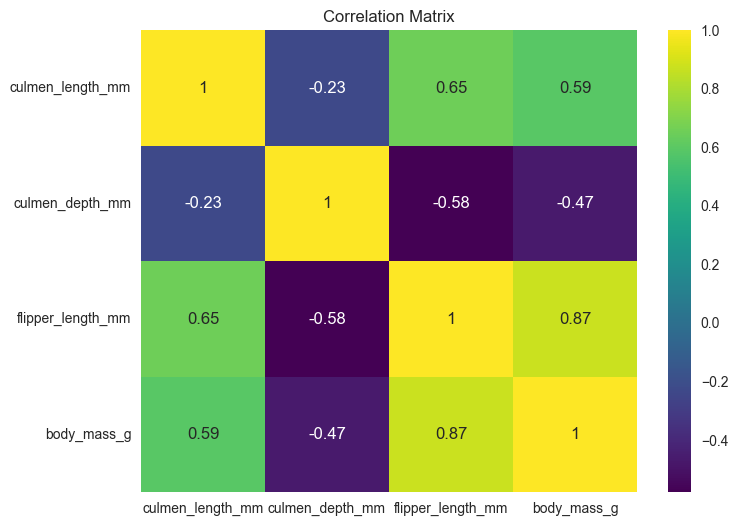

In [32]:
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes("number").corr(),annot=True, cmap='viridis')
plt.title("Correlation Matrix")

plt.show()

* **Tree base modeller multicollinearty den etkilenmiyor**. Cozmuyor, ama etkilenmiyor.


* 0.87 korelasyon var ama bu 0.90'dan buyuk olmadigi icin sorun degil. 


* Cunku non-parametrik (buyuktur-kucuktur seklinde) testler uyguluyor. 


**NOT:** Karar Agaclari (DT) Multicollinearty'ye karsi direnclidir. Cunku DT de dogrusallik, dogrusal iliski onemli degil burada. 

Karar ağaçları çoklu doğrusal bağlantı (multicollinearity) problemlerine karşı dayanıklıdır çünkü bu modeller doğrusal olmadığı için featureler arasındaki doğrusal ilişkileri dikkate almazlar. Yani, bir **karar ağacı modeli eğitirken multicollinearity'den kaynaklanan bir sorun yaşanmaz**.

## Feature Engineering

In [33]:
df.drop("species", axis =1)  # targeti ayirdik

island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0    Torgersen              39.1             18.7              181.0   
1    Torgersen              39.5             17.4              186.0   
2    Torgersen              40.3             18.0              195.0   
4    Torgersen              36.7             19.3              193.0   
5    Torgersen              39.3             20.6              190.0   
..         ...               ...              ...                ...   
338     Biscoe              47.2             13.7              214.0   
340     Biscoe              46.8             14.3              215.0   
341     Biscoe              50.4             15.7              222.0   
342     Biscoe              45.2             14.8              212.0   
343     Biscoe              49.9             16.1              213.0   

     body_mass_g     sex  
0         3750.0    MALE  
1         3800.0  FEMALE  
2         3250.0  FEMALE  
4         3450.0  FEMALE  
5         3650.0    MALE  
..           ...     ...  
338       4925.0  FEMALE  
340       4850.0  FEMALE  
341       5750.0    MALE  
342       5200.0  FEMALE  
343       5400.0    MALE  

[334 rows x 6 columns]

In [34]:
pd.get_dummies(df.drop("species", axis = 1), drop_first=True)  # get-dummy yapiyoruz. get-dummy data leakage neden olmaz
# drop first  dummy feature sayisini birer azaltarak daha az feature ile ayni basariyi elde ediyoruz.
# Multicollinearity sorununu da onler drop first

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0                39.1             18.7              181.0       3750.0   
1                39.5             17.4              186.0       3800.0   
2                40.3             18.0              195.0       3250.0   
4                36.7             19.3              193.0       3450.0   
5                39.3             20.6              190.0       3650.0   
..                ...              ...                ...          ...   
338              47.2             13.7              214.0       4925.0   
340              46.8             14.3              215.0       4850.0   
341              50.4             15.7              222.0       5750.0   
342              45.2             14.8              212.0       5200.0   
343              49.9             16.1              213.0       5400.0   

     island_Dream  island_Torgersen  sex_MALE  
0               0                 1         1  
1               0                 1         0  
2               0                 1         0  
4               0                 1         0  
5               0                 1         1  
..            ...               ...       ...  
338             0                 0         0  
340             0                 0         0  
341             0                 0         1  
342             0                 0         0  
343             0                 0         1  

[334 rows x 7 columns]

## Train | Test Split

In [35]:
X = pd.get_dummies(df.drop("species", axis = 1), drop_first=True) 
y = df["species"]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

**DT'de scale islemi yapmiyoruz**. Cunku biz gercek degerleriyle bir siniflandirma yapmak istiyoruz.

**Scale gerek olmdigi icin pipline de yapmayiz DT de**

In [37]:
DT_model = DecisionTreeClassifier(random_state = 101) 
# Target categorical oldugu icin classification ile gittik. 
# Target continius olsaydi DT reggresyon (OLS) ile giderdik.

In [38]:
DT_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=101)

In [39]:
y_pred = DT_model.predict(X_test)

In [40]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [41]:
# For default settings of figures; 

plt.rcParams.update(plt.rcParamsDefault)

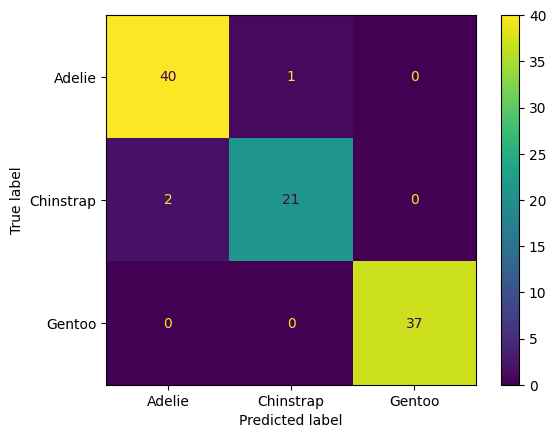

In [42]:
plot_confusion_matrix(DT_model,X_test,y_test)
plt.show()

In [43]:
# Capraz kosegendekiler dogru bildikleri. Digerleri hatalar. 
# Gentoo grafiklerde de ayrilmisti, burada gepsni dogru bilmis. 

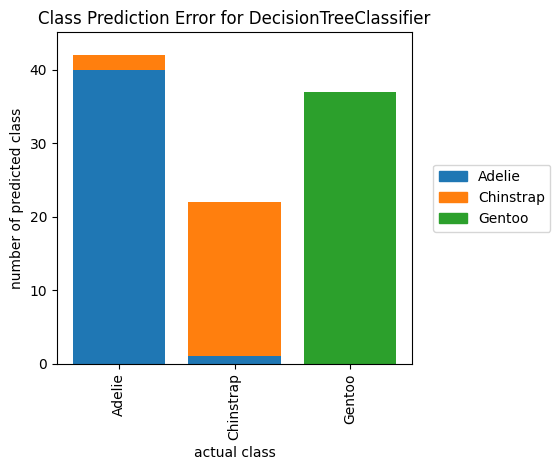

In [44]:
# Kullan bunu

visualizer = ClassPredictionError(DT_model)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.poof();

# yukarıdaki heatmap'in farklı grafiğinin yorumlanması gibi hataların hangi sınıfa ait olduğunu veriyor 

In [45]:
eval_metric(DT_model, X_train, y_train, X_test, y_test)

Test_Set
[[40  1  0]
 [ 2 21  0]
 [ 0  0 37]]
              precision    recall  f1-score   support

      Adelie       0.95      0.98      0.96        41
   Chinstrap       0.95      0.91      0.93        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.97      0.96      0.97       101
weighted avg       0.97      0.97      0.97       101


Train_Set
[[105   0   0]
 [  0  45   0]
 [  0   0  83]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       105
   Chinstrap       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



In [46]:
# "macro avg" ye bakiyoruz balanced ve coklu class oldugu icin !!!!
# DT de OVERFIT her zaman masada olacak, CV ile de bakmak yararli olur. 

**NOT:** Continius datalarda 1 yakalamak cok zor ama kategorik datalarda gorerbiliyoruz. 
* Burada trainde %100 basari var, model mukemmel ogrenmis. Test kisminda basari gorece az daha dusuk ama OVERFIT yok. 
* Test kimsinda en iyi basari Gentoo da, onu Adelie ve Chinstrap takip etmis. 

Balance data Accuracy'de bakiyrouz ama burada 3 kategori var. Burada accuracy 3 tur icin de gecerlidir. 

micro_avg de accuracy ile ayni sonucu verir. 


* **micro_avg** = Target verileri dengedeyse (esit veya yakin) (**balanced dataysa**) = accuracy 
* **macro_avg** = datamda bir dengesizlik (**unbalanced data**) varsa bakıyordum
* **weighted_avg** = eğer datam **dengesiz**  (1-4 dengede degilse) ancak **ben sayısı yüksek olana göre bakmak istiyorsam** kullanıyordum




## Cross Validate

In [47]:
model = DecisionTreeClassifier(random_state=101)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

# microlari gormek icin bu seferlik yazdik, her zaman gerek yok bu micro lara.

fit_time  score_time  test_accuracy  test_precision_micro  \
1   0.004761    0.006916       0.958333              0.958333   
2   0.001069    0.013463       0.958333              0.958333   
3   0.007219    0.006535       0.916667              0.916667   
4   0.006795    0.003623       0.956522              0.956522   
5   0.005090    0.010909       1.000000              1.000000   
6   0.003200    0.005983       1.000000              1.000000   
7   0.009065    0.012534       1.000000              1.000000   
8   0.003250    0.014362       1.000000              1.000000   
9   0.004385    0.000000       0.869565              0.869565   
10  0.004596    0.006436       1.000000              1.000000   

    test_recall_micro  test_f1_micro  
1            0.958333       0.958333  
2            0.958333       0.958333  
3            0.916667       0.916667  
4            0.956522       0.956522  
5            1.000000       1.000000  
6            1.000000       1.000000  
7            1.000000       1.000000  
8            1.000000       1.000000  
9            0.869565       0.869565  
10           1.000000       1.000000

In [48]:
df_scores.mean()[2:]

test_accuracy           0.965942
test_precision_micro    0.965942
test_recall_micro       0.965942
test_f1_micro           0.965942
dtype: float64

**micro_avg skorlar ile accuracy ayni anlama geliyor, sonuclari ayni.**

## Feature Importances

DT nin onemli ve gucli bir ozelligi bu Feature Importance. 

In [49]:
# Kullan bunu;

DT_model.feature_importances_  # katsayilari onem srasina gore dondurur. DT nin guclu bir yani bu. 

array([0.32591819, 0.05289252, 0.54282921, 0.        , 0.07836008,
       0.        , 0.        ])

In [50]:
df_f_i = pd.DataFrame(index=X.columns, data = DT_model.feature_importances_, 
                      columns = ["Feature Importance"]).sort_values("Feature Importance")
df_f_i

Feature Importance
body_mass_g                  0.000000
island_Torgersen             0.000000
sex_MALE                     0.000000
culmen_depth_mm              0.052893
island_Dream                 0.078360
culmen_length_mm             0.325918
flipper_length_mm            0.542829

* bunlarin toplami 1 dir. Bu ozelligi Random Forest ten almis DT.

* Model en yuksek insight aldigindan baslar, asagi dogru gider, Importancesi 0 olanlara bakmaz model. Lasso gubu davranir...

* En yuksek skor alani dusurerek bir daha bak, belki burada sifir olanlarin degerleri (onem derecesi) yukselebilir. 

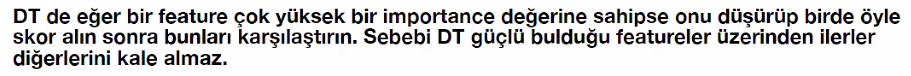

yani flipper_length_mm    feature i drop yapip oyle mi bakmak gerek


Flipper_length’i yani en onemli feature’u bir dusurun oyle bir calistirin, o olmadan belki digerlerinden daha fazla insight alacak. Flipper_length varken digerlerine 0 verdi gecti belki.

**Yuksek onemdeki featureyi kullan**irken digerlerinden gelecek insigthlerden bizi mahrum birakabiliyor. 



**DT de eğer bir feature çok yüksek bir importance değerine sahipse onu düşürüp birde öyle skor alın sonra bunları karşılaştırın. Sebebi DT güçlü bulduğu featureler üzerinden ilerler diğerlerini kale almaz.** Lasso gibi davranir, kellelerini alir.

**En önemlisi kanat uzunluğu ve gaga uzunluğu en önemli %90 oranında bizim için önemli
işte bu durum bizim modelimizin overfitting e gitmesine neden olabiliyor. DT önemli featurelerle eğer datanın örnke verecek olursak %90 ını ayırt edebiliyorsa diğer featureleri kullanmaz önemsizleştirir. Buda o featurelerden alacağımız insight lardan bizi yoksun bırakır.**

**hatırlarsanız modelimiz çok compexity olduğunda bizi overfittinge götürüyor demiştim. işte size bir overfitting sebebi daha eğer çok önemli bir feature varsa bu da bizi overfittinge götürebilir. Bunu göreceğiz**

In [51]:
0.542829+0.325918+0.052893+0.078360  # toplamlari 1 olur feature importance lerin 

0.9999999999999999

In [52]:
0.542829+0.325918  # 2 feature ile etkinin %87'sini alabiliyoruz. 

0.8687469999999999

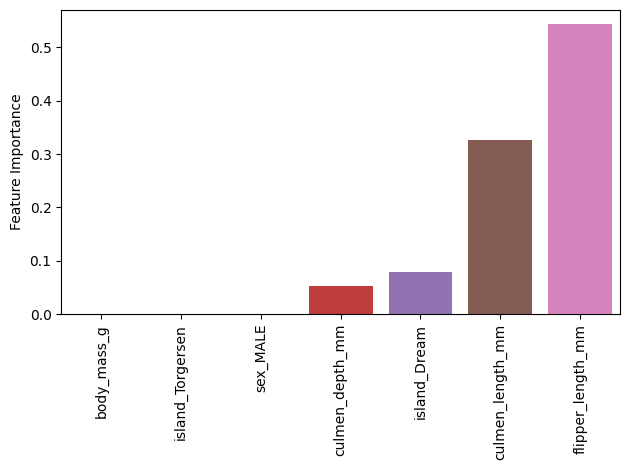

In [53]:
# Features importance grafigi, kullan bunu da;

sns.barplot(x = df_f_i.index, y = 'Feature Importance', data = df_f_i)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

## Drop most important feature

**En onemli feature i attigimizda skorlarin artacaginin garantisi yok. Skorlar iyiesmzese ilk mhaliyle devam et.**

**En onemli feature i attigimiz durumda ve atmadan yapilan Grid Search lerde benzer sonuclar alabiliyoruz.** 

In [82]:
X2 = X.drop(columns = ["flipper_length_mm"], axis =1) # En onemli olani dusurelim

In [83]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.3, random_state=101)

In [84]:
DT2_model = DecisionTreeClassifier(random_state=101)

In [85]:
DT2_model.fit(X_train2, y_train2) 

DecisionTreeClassifier(random_state=101)

In [86]:
eval_metric(DT2_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[41  0  0]
 [ 1 22  0]
 [ 1  0 36]]
              precision    recall  f1-score   support

      Adelie       0.95      1.00      0.98        41
   Chinstrap       1.00      0.96      0.98        23
      Gentoo       1.00      0.97      0.99        37

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101


Train_Set
[[105   0   0]
 [  0  45   0]
 [  0   0  83]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       105
   Chinstrap       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



In [59]:
# En buyugu atinca macro ve diger scorlar iyilesti.

In [60]:
df_f_i2 = pd.DataFrame(index=X2.columns, data = DT2_model.feature_importances_, 
                      columns = ["Feature Importance"]).sort_values("Feature Importance")
df_f_i2

Feature Importance
body_mass_g                 0.000000
island_Torgersen            0.000000
sex_MALE                    0.010853
culmen_depth_mm             0.113994
island_Dream                0.370391
culmen_length_mm            0.504762

In [61]:
model = DecisionTreeClassifier(random_state=101)

scores = cross_validate(model, X_train2, y_train2, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

fit_time  score_time  test_accuracy  test_precision_micro  \
1   0.005064    0.007253       1.000000              1.000000   
2   0.004553    0.010122       1.000000              1.000000   
3   0.000000    0.010104       0.958333              0.958333   
4   0.009784    0.002864       1.000000              1.000000   
5   0.001900    0.002617       1.000000              1.000000   
6   0.005136    0.000000       1.000000              1.000000   
7   0.008418    0.011394       1.000000              1.000000   
8   0.006126    0.009386       1.000000              1.000000   
9   0.004687    0.002485       1.000000              1.000000   
10  0.002667    0.009698       0.956522              0.956522   

    test_recall_micro  test_f1_micro  
1            1.000000       1.000000  
2            1.000000       1.000000  
3            0.958333       0.958333  
4            1.000000       1.000000  
5            1.000000       1.000000  
6            1.000000       1.000000  
7            1.000000       1.000000  
8            1.000000       1.000000  
9            1.000000       1.000000  
10           0.956522       0.956522

In [62]:
df_scores.mean()[2:]

test_accuracy           0.991486
test_precision_micro    0.991486
test_recall_micro       0.991486
test_f1_micro           0.991486
dtype: float64

In [63]:
# Best featureyi dusurnce modelin basarisi artti, test skorlari %99 oldu. 

## Skorlari alttaki gibi almak icin manuel kod

In [64]:
scoring = {'precision-Adelie': make_scorer(precision_score,  average=None, labels=["Adelie"]),
           'recall-Adelie': make_scorer(recall_score, average=None, labels =["Adelie"]),
           'f1-Adelie': make_scorer(f1_score, average=None, labels = ["Adelie"]),
          
          'precision-Chinstrap': make_scorer(precision_score,  average=None, labels=["Chinstrap"]),
          'recall-Chinstrap': make_scorer(recall_score, average=None, labels=["Chinstrap"]),
          'f1-Chinstrap': make_scorer(f1_score, average=None, labels=["Chinstrap"]),
          
          
          'precision-Gentoo': make_scorer(precision_score,  average=None, labels=["Gentoo"]),
          'recall-Gentoo': make_scorer(recall_score, average=None, labels = ["Gentoo"]),
          'f1-Gentoo': make_scorer(f1_score, average=None, labels = ["Gentoo"]),
          
          }

In [65]:
model = DecisionTreeClassifier(max_depth=None, random_state=101)

scores = cross_validate(model, X_train2, y_train2, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision-Adelie       1.000000
test_recall-Adelie          0.980909
test_f1-Adelie              0.989975
test_precision-Chinstrap    0.983333
test_recall-Chinstrap       1.000000
test_f1-Chinstrap           0.990909
test_precision-Gentoo       0.988889
test_recall-Gentoo          1.000000
test_f1-Gentoo              0.994118
dtype: float64

## Visualize the Tree

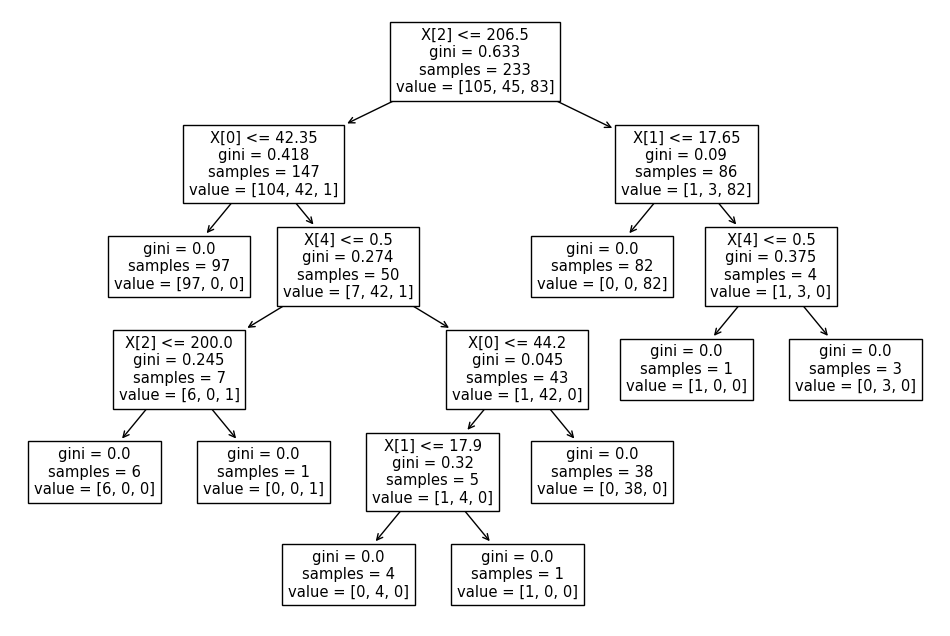

In [89]:
plt.figure(figsize=(12,8))
plot_tree(DT_model);
plt.show()

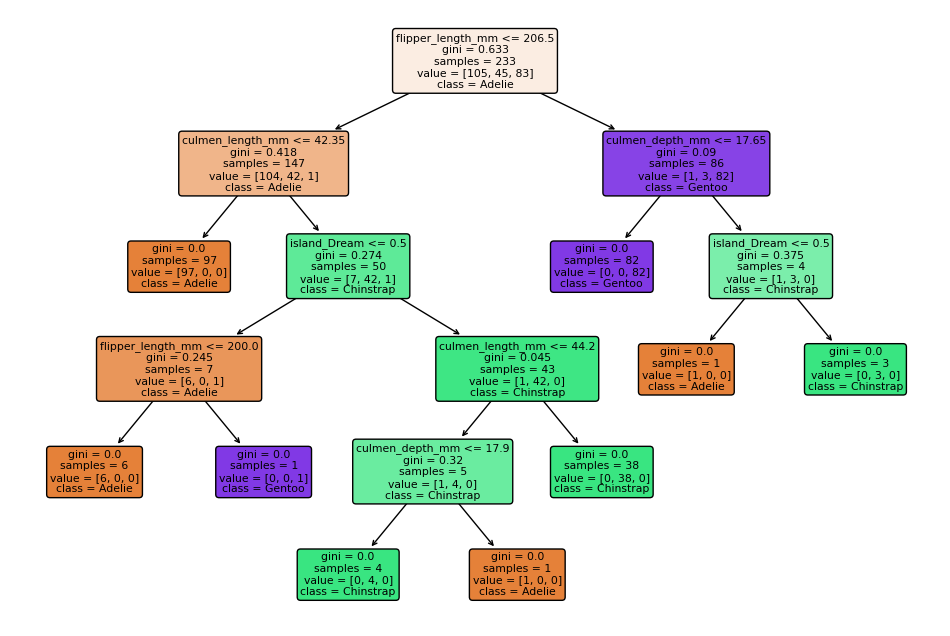

In [90]:
# Most important feature atilmadan onceki durum;

plt.figure(figsize=(12,8),dpi=100)
plot_tree(DT_model, filled=True, feature_names=X.columns, rounded = True, class_names=df.species.unique());
plt.show()

In [68]:
# ENTROPI 1 E YAKLASTIGINDA KAOS ARTIYOR. Entropy 1 in uzerine cikabilir binary de en fazla 1 olabilirken 3 kategorili target durumunda 1'in uzerine de cikabilir. 
# GINI 0 YAKLASTIGINDA PURITY, GINI 0.5 E YAKLASTIGINDA ESITLIK (KAOS) ARTIYOR. 1 E YAKLASTIGINDA ISE TAMAMEN RASTGELE DAGILIM VARDIR. GINI 1 OLAMAZ. 

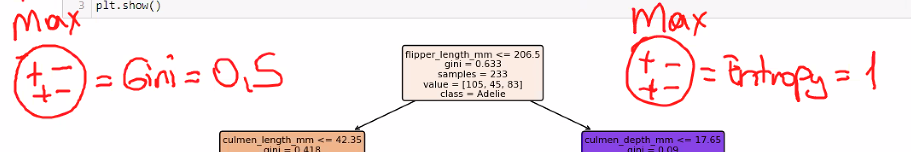

0.0.1  Gini Impurity (Gini Katsayısı):
Gini katsayısı, bir karar ağacının bölünmesi sonucu oluşan grupların ne kadar karışık olduğunu (yani bir grup içinde farklı sınıfların ne kadar karışık olduğunu) belirler. Gini katsayısı, 0'dan 1'e kadar değerler alır. 0, bir grup içindeki tüm öğelerin aynı sınıfa ait olduğu anlamına gelir (yani grup safdır). 1, bir grup içindeki öğelerin eşit derecede dağılmış olduğu anlamına gelir (yani grup tamamen karışıktır). Gini impurity genellikle hızlı hesaplanabilir ve pratikte sıkça kullanılır.

Gini katsayısı, bir düğümdeki örneklere bakarak saf olmayanlığı ölçer. Gini katsayısı, bir düğümdeki rastgele seçilen bir örneğin yanlış sınıflandırılma olasılığını temsil eder.
Hesaplaması daha hızlıdır çünkü logaritmik fonksiyonları içermez, bu nedenle daha büyük veri setleriyle çalışırken genellikle daha hızlıdır.
Gini katsayısı, veri setinin dengeli olup olmadığına daha az duyarlıdır, yani bir sınıftaki örneklerin sayısı diğer sınıftakilerden çok daha fazla olduğunda.
Gini genellikle ikili ayrımı tercih eder, yani genellikle iki alt düğüm oluşturur.
0.0.2  Entropy (Entropi):
Entropi, bir grup içindeki belirsizliği ölçer. Entropi değeri, bir grup içindeki öğelerin bir sınıfa ait olma olasılığının logaritmasının çarpımının negatif değeri olarak hesaplanır. Entropi, 0 (grup tamamen safdır) ve 1 (grup tamamen karışıktır) arasında değerler alır.

Entropi, bir düğümdeki rastgele seçilen bir örneğin belirsizliğini ölçer. Daha teknik bir ifadeyle, entropi bir düğümdeki bilgi karmaşıklığını ölçer.
Entropi hesaplaması, logaritmik işlemler içerir ve bu nedenle Gini katsayısına göre genellikle daha yavaştır.
Entropi, veri setindeki sınıf dengesizliğine daha duyarlıdır, yani bir sınıftaki örneklerin sayısı diğer sınıftakilerden çok daha fazla olduğunda.
Entropi genellikle çoklu ayrımı tercih eder, yani genellikle birden fazla alt düğüm oluşturur.
0.0.3  Information Gain (Bilgi Kazancı):
Bilgi kazancı, bir karar ağacının bölünmesi sonucu elde edilen entropi azalmasını ölçer. Bilgi kazancı ne kadar yüksek olursa, karar ağacının bölünmesi o kadar fazla bilgi sağlar.

0.0.4  Log Loss:
Log loss, özellikle sınıflandırma problemlarında kullanılan bir hata ölçüsüdür. İdeal olarak, doğru sınıf için tahmin edilen olasılık 1'e (yani tamamen doğru) yakın olmalı ve yanlış sınıflar için tahmin edilen olasılık 0'a (yani tamamen yanlış) yakın olmalıdır. Log loss, modelin tahminlerinin ne kadar doğru olduğunu değil, tahminlerin ne kadar kesin olduğunu ölçer.

Log loss değerini hesaplarken, gerçek sınıf etiketi ve tahmin edilen olasılık değeri kullanılır. Log loss, tahmin edilen olasılıkların gerçek etiketlere ne kadar yakın olduğunu ölçer. Yani, tahmin edilen olasılıklar gerçek etiketlere ne kadar yakınsa, log loss değeri o kadar düşük olur.

Log loss değerinin ideal değeri 0'dır. Bu, modelin tüm tahminlerini doğru yaptığı ve yanıtların kesin olduğu anlamına gelir.

Avantajları:

Log loss, olasılıkların kesinliğini ölçer, bu da modelin ne kadar emin olduğunu anlamak için faydalıdır.
Kesin tahminler için cezalandırır. Yani, yanlış olan bir tahmine ne kadar emin olursa, model o kadar çok cezalandırılır.
Dezavantajları:

Log loss, etiketlerin tamamen doğru olduğunu varsayar. Yani, eğer etiketlerde hata varsa veya etiketler belirsizse, modelin performansı düşebilir.
Log loss, modelin kalibrasyonunu ölçer. Yani, modelin olasılıklarını tahmin etme yeteneğini ölçer, ancak bu her zaman modelin genel doğruluğu ile doğrudan ilişkili olmayabilir.
Genellikle, log loss ile birlikte diğer performans metrikleri de (örneğin, doğruluk, hassasiyet, özgünlük, F1 skoru) kullanılır. Bu, modelin performansının daha kapsamlı bir değerlendirmesini sağlar.



************

**Gini Katsayısı**: Gini katsayısı, bir düğümdeki örneklere bakarak saf olmayanlığı ölçer. Gini katsayısı, bir düğümdeki rastgele seçilen bir örneğin yanlış sınıflandırılma olasılığını temsil eder. Hesaplaması daha hızlıdır çünkü logaritmik fonksiyonları içermez. Gini katsayısı, veri setinin dengeli olup olmadığına daha az duyarlıdır. Gini genellikle ikili ayrımı tercih eder.

**Entropi**: Entropi, bir düğümdeki rastgele seçilen bir örneğin belirsizliğini ölçer. Daha teknik bir ifadeyle, entropi bir düğümdeki bilgi karmaşıklığını ölçer. Entropi hesaplaması, logaritmik işlemler içerir ve bu nedenle genellikle daha yavaştır. Entropi, veri setindeki sınıf dengesizliğine daha duyarlıdır. Entropi genellikle çoklu ayrımı tercih eder.

**Bilgi Kazanımı (Information Gain)**: Bilgi kazanımı, bir özellikle ağacın dallanmasının sonucunda entropinin ne kadar azaldığını ölçer. Yani, bir özellik ne kadar çok bilgi kazanımı sağlarsa, o özellik karar ağacının o düğümünde daha önemli hale gelir. Bilgi kazanımı, entropi kullanılarak hesaplanır ve ağacın dallanma kararlarını yönlendirir.

**Log Loss**: Log loss, sınıflandırma problemlarında kullanılan bir hata ölçüsüdür. Tahmin edilen olasılıkların gerçek etiketlere ne kadar yakın olduğunu ölçer. Log loss, tahminlerin ne kadar doğru olduğunu değil, tahminlerin ne kadar kesin olduğunu ölçer. Log loss değerinin ideal değeri 0'dır. Bu, modelin tüm tahminlerini doğru yaptığı ve yanıtların kesin olduğu anlamına gelir.

Bu dört kavram, genellikle karar ağaçları ve rastgele ormanlar gibi algoritmaların performansını ölçmek ve modelin öğrenmesini yönlendirmek için kullanılır. Bunlar, bir düğümün veya bir özelliğin sınıflandırma performansını ölçmek için kullanılır. Bu ölçütler, hangi özelliğin daha fazla bilgi kazanımı sağladığını ve hangi özelliğin bir karar ağacında dallanma için daha iyi bir seçenek olduğunu belirlemeye yardımcı olur.

Ayrıca, bu ölçütler sadece karar ağaçları ve rastgele ormanlarla sınırlı değildir. Örneğin, log loss genellikle lojistik regresyon, sinir ağları ve diğer olasılık temelli sınıflandırma modellerinin performansını ölçmek için kullanılır.

Bu ölçütlerin hangisinin belirli bir durum için en uygun olduğunu belirlemek, genellikle uygulamaya, veriye ve modelin kullanıldığı bağlama bağlıdır. Bu nedenle, bu ölçütlerin etkinliği genellikle deneysel olarak belirlenir.


*******************

Karar ağaçları ve onların türevi olan modeller (örneğin, Rastgele Ormanlar ve Gradient Boosting), özelliklerin ölçeklendirilmesinden etkilenmez. Yani, özelliklerinizin birinin ölçeği 1 ile 10 arasında ve diğerinin 1 ile 100.000 arasında olduğunu varsayarsak, bu karar ağaçlarının performansını etkilemez. Bu, karar ağaçlarının özelliklerin belirli bir değerden büyük veya küçük olup olmadığını kontrol etme şekli nedeniyle olur. Yani, özelliklerin ölçeğinin karar ağaçları üzerinde hiçbir etkisi yoktur.

Özelliklerin ölçeklendirilmesi genellikle mesafe temelli algoritmalar (örneğin, K-En Yakın Komşu ve Destek Vektör Makineleri) veya gradyan iniş kullanılan algoritmalar (örneğin, derin öğrenme modelleri) için önemlidir. Bu tür algoritmalar, özelliklerin ölçeğinden büyük ölçüde etkilenebilir, bu yüzden genellikle veri önceden ölçeklendirilir.

Benzer şekilde, karar ağaçları özellik seçimine de duyarlı değildir çünkü her bir özelliği ayrı ayrı değerlendirirler ve en iyi bölünme noktasını bulmak için her özelliği kullanabilirler.

Bununla birlikte, karar ağaçları ve benzeri modellerin hazırlık aşamasında kullanılması gereken bazı ön işleme adımları vardır. Örneğin, eksik değerler genellikle doldurulmalı veya silinmeli ve kategorik değişkenler genellikle sayısal değerlere dönüştürülmelidir. Ayrıca, veri setindeki aykırı değerlerin etkisini azaltmak için bazen bazı özellik mühendislik teknikleri de uygulanabilir. Ancak bu adımlar genellikle "pipeline" işlemi olarak düşünülmez, çünkü modelin kendisi tarafından değil, veri seti üzerinde gerçekleştirilirler.


************

 **Gini'nin en kötü değeri 0.5. 1 olması teorik olması imkansız. 1'e yaklaşması rastsallığın max olduğu durumdur.**
 
**Entropy'nin en kötü değeri 1 dir. (Bu noktada Gini=0.5)**

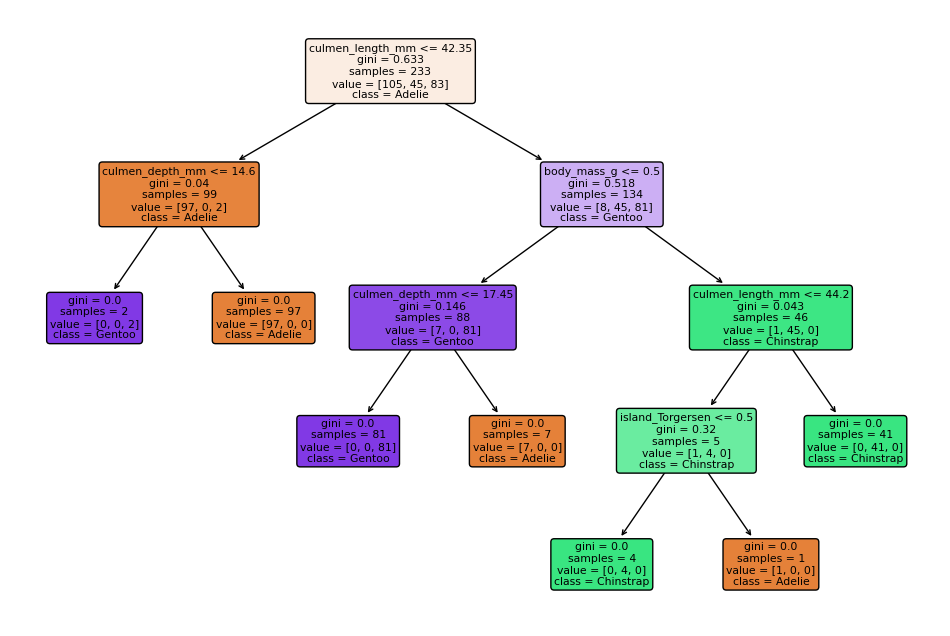

In [69]:
# Most inportant feature atildiktan soraki durum;


plt.figure(figsize=(12,8),dpi=100)
plot_tree(DT2_model, filled=True, feature_names=X.columns, rounded = True, class_names=df.species.unique());
plt.show()

**decision_tree:** Görselleştirilmek istenen karar ağacı nesnesi.

**max_depth:** Ağaçtaki maksimum derinlik. Eğer belirtilmezse tüm ağaç gösterilir.

**feature_names:** Özelliklerin (features) isimleri. Bu sayede ağaç üzerinde gösterilen özelliklerin daha anlamlı isimleri olabilir.

**class_names:** Hedef sınıfların (target classes) isimleri. Bu, ağacın sonunda veri noktalarının hangi sınıflara ait olduğunu göstermek için kullanılır.

**label:** 'all', 'root', 'none' arasında bir değer olabilir. Hangi düğüm etiketlerinin gösterilip gösterilmeyeceğini belirtir.

**filled:** Boolean değeri. True olduğunda, düğümler sınıflara göre renklendirilir.

**impurity:** Boolean değeri. True olduğunda, düğümlerde saflık (genellikle Gini saflığı) gösterilir.

**node_ids:** Boolean değeri. True olduğunda, her düğüm için düğüm ID'leri gösterilir.

**proportion:** Boolean değeri. True olduğunda, her düğümdeki örneklerin oranı gösterilir.

**rounded:** Boolean değeri. True olduğunda, düğüm kutularının köşeleri yuvarlanır.

**precision:** Noktadan sonraki basamak sayısı. Bu, gösterilen ondalıklı değerlerin hassasiyetini ayarlar.

**ax:** Matplotlib eksen nesnesi. Eğer belirtilmezse mevcut eksen kullanılır veya yeni bir eksen oluşturulur.

**fontsize:** Yazı tipi boyutu. Düğümlerdeki metnin boyutunu belirtmek için kullanılır.

## Understanding Hyperparameters

In [70]:
def report_model(model):
    model_pred = model.predict(X_test)
    model_train_pred = model.predict(X_train)
    print('\n')
    print("Test Set")
    print(confusion_matrix(y_test, model_pred))
    print('\n')
    print(classification_report(y_test,model_pred))
    print('\n')
    print("Train Set")
    print(confusion_matrix(y_train, model_train_pred))
    print('\n')
    print(classification_report(y_train,model_train_pred))
    plt.figure(figsize=(12,8),dpi=100)
    plot_tree(model,filled=True, feature_names=X.columns, class_names=df.species.unique());

**criterion:** Karar ağacını bölerken kullanılan fonksiyonu belirtir. 'gini' (Gini saflığı) veya 'entropy' (bilgi kazancı) olabilir.

**splitter:** Her düğümdeki bölünmeyi nasıl seçeceğini belirtir. 'best' en iyi bölünmeyi seçerken, 'random' rastgele bir bölünme seçer.

**max_depth:** Ağacın maksimum derinliği. Ağacın ne kadar derin olabileceğini sınırlamak için kullanılır.
min_samples_split: Bir düğümü bölmek için gereken minimum örnek sayısı.

**min_samples_leaf:** Bir yaprağın (düğümün sonu) sahip olması gereken minimum örnek sayısı.

**min_weight_fraction_leaf:** Bir yaprakta bulunması gereken minimum ağırlıklı örnek oranı.

**max_features:** Her bölünmede dikkate alınacak maksimum özellik sayısı. 'auto', 'sqrt', 'log2' veya bir tam sayı olabilir.

**random_state:** Rastlantısallığın kontrol edildiği parametre. Modeli yeniden çalıştırdığınızda aynı sonuçları elde etmek için kullanılır.

**max_leaf_nodes:** Maksimum yaprak düğümü sayısı. Bu sayıyı sınırlayarak ağacın büyümesini sınırlayabilirsiniz.

**min_impurity_decrease:** Bir düğümü bölmek için gerekli minimum saflık azalması.

**class_weight:** Sınıfların ağırlıkları. Dengelemeyi veya özel sınıf ağırlıklandırmasını yapmak için kullanılır.

**ccp_alpha:** Cost-complexity pruning'in (Maliyet-karmaşıklık budaması) alfası. Ağacın budamasını kontrol etmek için kullanılır. Daha yüksek değerler, daha fazla budamaya neden olur.

## Max Depth

DT nin en onemli parametresidir. 

Inilecek derinligi soyler

Root Nodeden sonra ayrilacak katman sayisini verir.

Defaultu "None" dir, sifir hataya kadar git demektir ama OVERFIT geliyor karsidan :)

MaxDepth'i 2, 3, 4, 5 gibi dene, sonra GridSearch;de buradaki en iyi degeri verebilirsin.

**hyperparametreleri birbiriyle iliskilidir. Bilgin olmayani kullanma, bozarsin.**

In [91]:
pruned_tree = DecisionTreeClassifier(max_depth=3, random_state=101)
pruned_tree.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=3, random_state=101)



Test Set
[[39  2  0]
 [ 1 22  0]
 [ 0  0 37]]


              precision    recall  f1-score   support

      Adelie       0.97      0.95      0.96        41
   Chinstrap       0.92      0.96      0.94        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.96      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101



Train Set
[[104   1   0]
 [  0  45   0]
 [  1   0  82]]


              precision    recall  f1-score   support

      Adelie       0.99      0.99      0.99       105
   Chinstrap       0.98      1.00      0.99        45
      Gentoo       1.00      0.99      0.99        83

    accuracy                           0.99       233
   macro avg       0.99      0.99      0.99       233
weighted avg       0.99      0.99      0.99       233



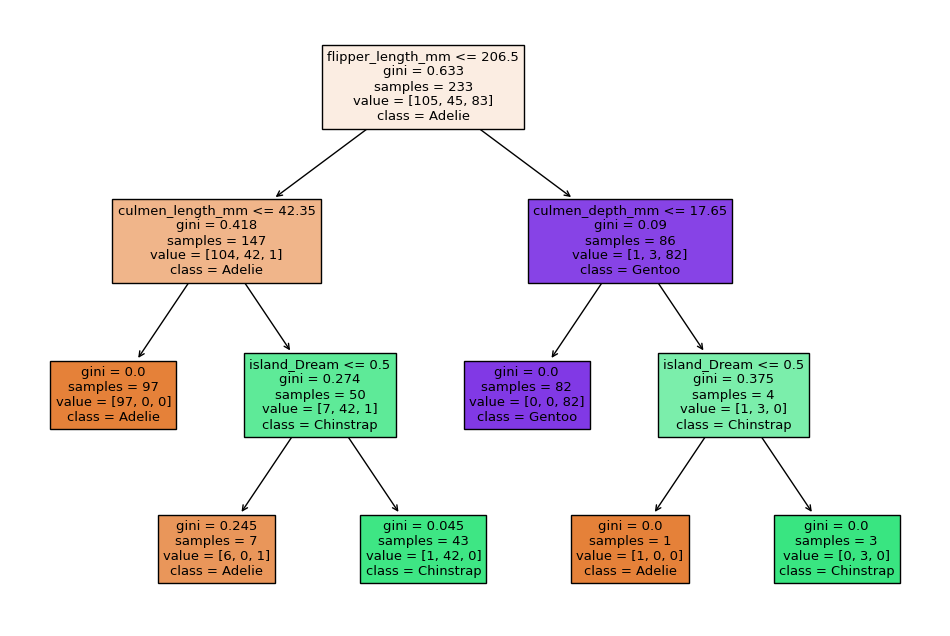

In [92]:
report_model(pruned_tree)

## Max Leaf Nodes

Max final yaprak sayisini giriyoruz. Diyelim ki 18 girdik, ama daha once (Or; 5 yaprak ile) purity'ye ulasirsa, orada keser islemi. 

In [93]:
pruned_tree_2 = DecisionTreeClassifier(max_leaf_nodes=5, random_state=101,)
pruned_tree_2.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=5, random_state=101)



Test Set
[[39  2  0]
 [ 1 22  0]
 [ 0  0 37]]


              precision    recall  f1-score   support

      Adelie       0.97      0.95      0.96        41
   Chinstrap       0.92      0.96      0.94        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.96      0.97      0.97       101
weighted avg       0.97      0.97      0.97       101



Train Set
[[103   2   0]
 [  0  45   0]
 [  1   0  82]]


              precision    recall  f1-score   support

      Adelie       0.99      0.98      0.99       105
   Chinstrap       0.96      1.00      0.98        45
      Gentoo       1.00      0.99      0.99        83

    accuracy                           0.99       233
   macro avg       0.98      0.99      0.99       233
weighted avg       0.99      0.99      0.99       233



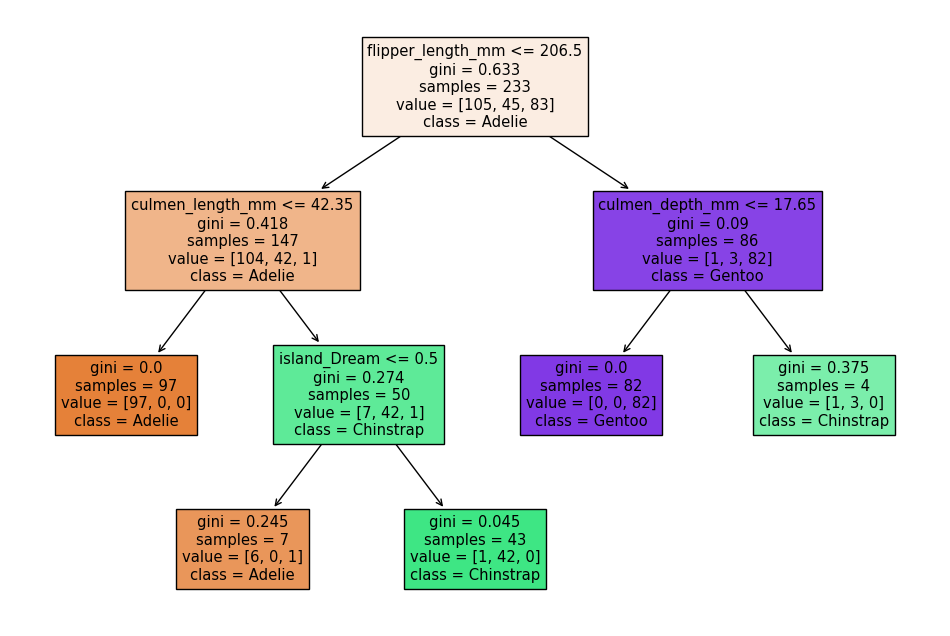

In [94]:
report_model(pruned_tree_2)

## Criterion

* Karar ağacını bölerken kullanılan fonksiyonu belirtir. 'gini' (Gini saflığı) veya 'entropy' (bilgi kazancı) olabilir. 


* Defaultu "Gini"dir.

In [75]:
# Biz burada criterion olarak "entropy"yi girdik, denemek amacli. 

entropy_tree = DecisionTreeClassifier(criterion='entropy', random_state=101,)
entropy_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=101)

In [87]:
report_model(entropy_tree)



Test Set
[[40  1  0]
 [ 2 21  0]
 [ 0  0 37]]


              precision    recall  f1-score   support

      Adelie       0.95      0.98      0.96        41
   Chinstrap       0.95      0.91      0.93        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.97      0.96      0.97       101
weighted avg       0.97      0.97      0.97       101



Train Set
[[105   0   0]
 [  0  45   0]
 [  0   0  83]]


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       105
   Chinstrap       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



In [77]:
# Target variablede 2'den fazla sinif oldugu icin entropi 1'den yuksek cikti burada. 

## Min Sample Split 

Bolunme yapmasi icin bir yaprakta kalmasi gereken min gozlem sayisi. Bunun altina dustugunde islemi durdurur.

Diger bir ifadeyle; bir düğümün bölünmeden önce sahip olması gereken minimum örnek sayısıdır.

min_sample = 5 dersek, kutuda 5 tane gozlem kalana kadar devam eder (5 eleman varken de bolunur), bir kutudaki gozlem sayisi 5'in altina dustugunde dallanmayi birakir. 

In [104]:
tree = DecisionTreeClassifier(min_samples_split=5)
tree.fit(X_train,y_train)

DecisionTreeClassifier(min_samples_split=5)



Test Set
[[40  1  0]
 [ 1 22  0]
 [ 0  0 37]]


              precision    recall  f1-score   support

      Adelie       0.98      0.98      0.98        41
   Chinstrap       0.96      0.96      0.96        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101



Train Set
[[104   1   0]
 [  0  45   0]
 [  0   0  83]]


              precision    recall  f1-score   support

      Adelie       1.00      0.99      1.00       105
   Chinstrap       0.98      1.00      0.99        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       0.99      1.00      0.99       233
weighted avg       1.00      1.00      1.00       233



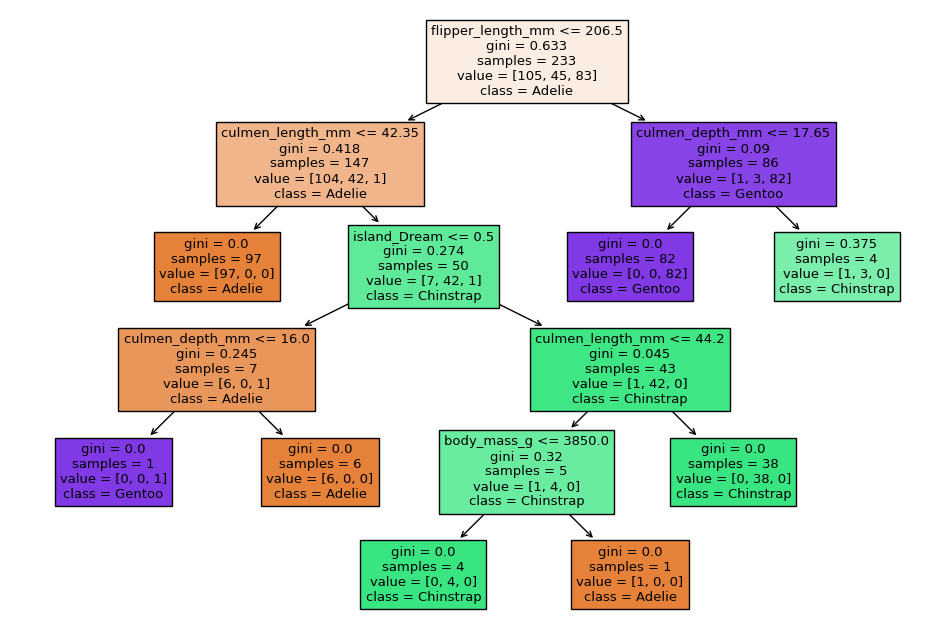

In [105]:
report_model(tree)

## max features, spliter

En iyi bölünmeyi ararken göz önünde bulundurulması gereken featureların sayısı.

Her bölünmede dikkate alınacak maksimum özellik sayısı. **'auto', 'sqrt', 'log2' veya bir tam sayı** olabilir.

In [80]:
%matplotlib inline  
# tree cikmiyorsa bunu calistir. 

UsageError: unrecognized arguments: # tree cikiyorsa bunu calistir.


In [106]:
tree = DecisionTreeClassifier(splitter = "best", max_features=2)
tree.fit(X_train,y_train)
# Rastgele 2 tane feature seciyor, onlarin en iyi (etkili) olani ile basliyor. 
# Once feature yi seciyor, sonra best durumunu calistiriyor. 
# Her seferinde (adimda) rastgele 2 feature secip, onlardan en iyisine bakarak bolunme yapiyor. 

DecisionTreeClassifier(max_features=2)



Test Set
[[39  2  0]
 [ 2 21  0]
 [ 0  0 37]]


              precision    recall  f1-score   support

      Adelie       0.95      0.95      0.95        41
   Chinstrap       0.91      0.91      0.91        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.96       101
   macro avg       0.95      0.95      0.95       101
weighted avg       0.96      0.96      0.96       101



Train Set
[[105   0   0]
 [  0  45   0]
 [  0   0  83]]


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       105
   Chinstrap       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



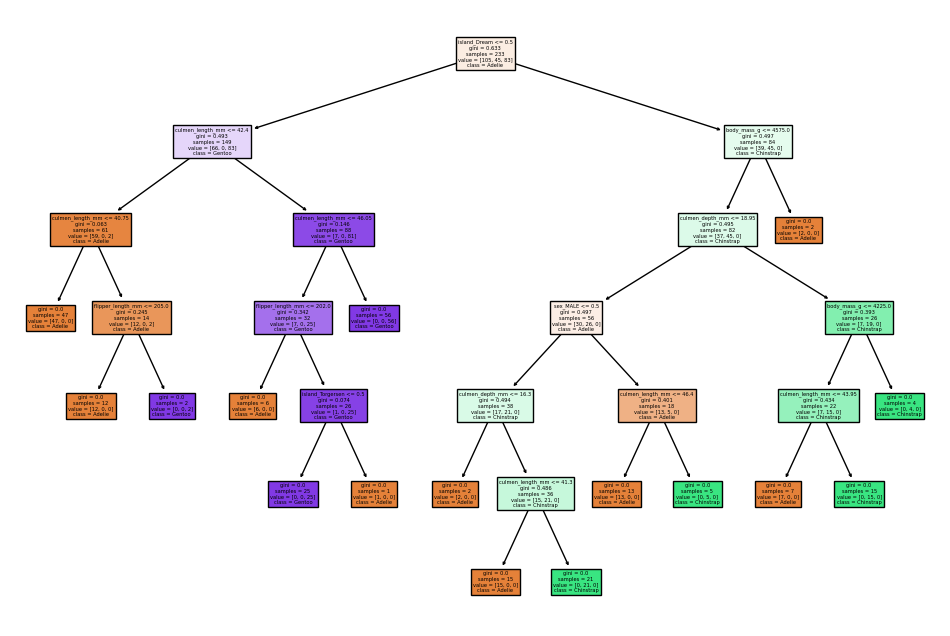

In [107]:
report_model(tree)

## Find Best Parameters (GridSearch)

Best parametreleri GridSearch kullanarak bulacagiz. 

In [110]:
from sklearn.model_selection import GridSearchCV

In [111]:
model = DecisionTreeClassifier(random_state=101)

In [112]:
param_grid = {"splitter":["best", "random"],
              "max_features":[None, "auto", "log2", 2, 3, 4, 5, 6, 7],
              "max_depth": [None, 2, 3, 4, 5],
              "min_samples_leaf": [1, 2, 3, 4, 5, 6, 7],
              "min_samples_split": [2, 3, 5, 6, 7, 8, 9]}

In [113]:
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='f1_micro',  # baska bir micro da yazabilirdik
                          cv=10,
                          n_jobs = -1)

In [114]:
grid_model.fit(X_train2, y_train2) # en onemli feature attiktan sonra yola yeni veri setiyle devam ediyoruz. 

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [None, 2, 3, 4, 5],
                         'max_features': [None, 'auto', 'log2', 2, 3, 4, 5, 6,
                                          7],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']},
             scoring='f1_micro')

In [117]:
grid_model.best_params_

{'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [116]:
eval_metric(grid_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[41  0  0]
 [ 1 22  0]
 [ 1  0 36]]
              precision    recall  f1-score   support

      Adelie       0.95      1.00      0.98        41
   Chinstrap       1.00      0.96      0.98        23
      Gentoo       1.00      0.97      0.99        37

    accuracy                           0.98       101
   macro avg       0.98      0.98      0.98       101
weighted avg       0.98      0.98      0.98       101


Train_Set
[[105   0   0]
 [  0  45   0]
 [  0   0  83]]
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       105
   Chinstrap       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



In [124]:
# Best parametreleri girerek agaci tekrar cizdirmek istiyorum;

tree = DecisionTreeClassifier(max_depth = None,
 max_features = None,
 min_samples_leaf = 1,
 min_samples_split = 2,
 splitter = 'best')
tree.fit(X_train2,y_train2)

DecisionTreeClassifier()



Test Set
[[40  1  0]
 [ 2 21  0]
 [ 0  0 37]]


              precision    recall  f1-score   support

      Adelie       0.95      0.98      0.96        41
   Chinstrap       0.95      0.91      0.93        23
      Gentoo       1.00      1.00      1.00        37

    accuracy                           0.97       101
   macro avg       0.97      0.96      0.97       101
weighted avg       0.97      0.97      0.97       101



Train Set
[[105   0   0]
 [  0  45   0]
 [  0   0  83]]


              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00       105
   Chinstrap       1.00      1.00      1.00        45
      Gentoo       1.00      1.00      1.00        83

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



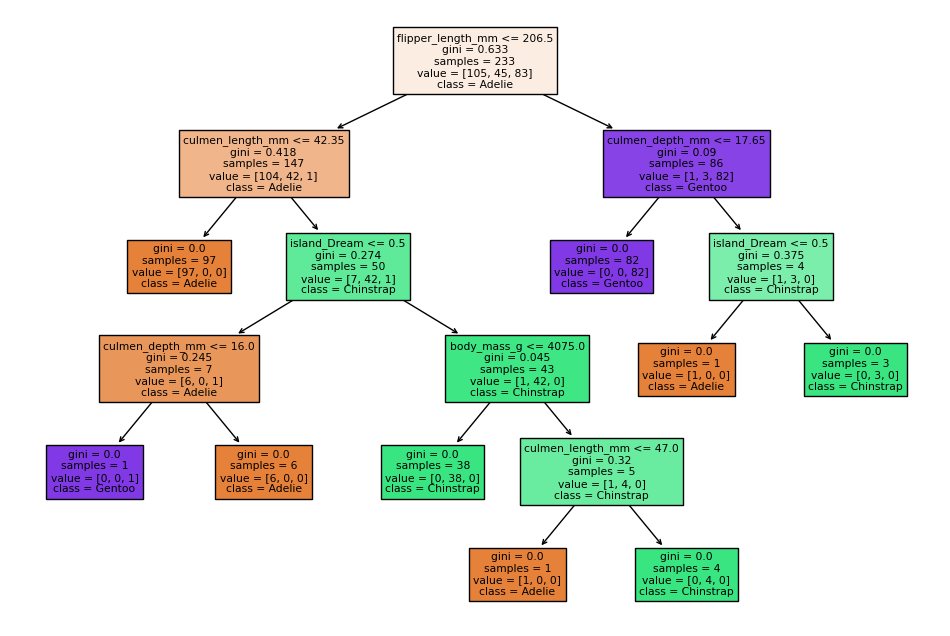

In [125]:
report_model(tree)

**NOT:** GridSearch'ta cikan degerler OVERFIT e goturmez. GUVENLE KULLANABILIRIZ... 

**The End**